In [60]:
import os
import sys
from collections import defaultdict
from itertools import combinations
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

import ete3
from ete3 import PhyloTree
from Bio import SeqIO

import Levenshtein

In [57]:
path_to_genbank = "../data/external/human_mt.gb"

In [58]:
dloops = []
for rec in SeqIO.parse(path_to_genbank, format="gb"):
    feature_dloop = [x for x in rec.features if x.type == "D-loop"]
    if len(feature_dloop) == 1:
        cur_dloop = str(feature_dloop[0].extract(rec.seq)).upper()
        dloops.append((rec.id, cur_dloop))
    else:
        print(feature_dloop)


[]


/home/mr/env_bio/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1218: BiopythonParserWarning: Premature end of file in sequence data
  warnings.warn(
/home/mr/env_bio/lib/python3.10/site-packages/Bio/GenBank/__init__.py:1380: BiopythonParserWarning: Expected sequence length 16568, found 13429 (MZ387218.1).
  warnings.warn(


In [61]:
data = []
for (id1, seq1), (id2, seq2) in tqdm.tqdm(combinations(dloops, 2)):
    d = Levenshtein.distance(seq1, seq2)
    data.append({
        "id1": id1,
        "id2": id2,
        "dist": d,
    })

977901it [00:51, 19135.73it/s]


In [62]:
df = pd.DataFrame(data)
df

,id1,id2,dist
0,OP830489.1,OP818064.1,7
1,OP830489.1,OP820437.1,7
2,OP830489.1,OP642525.1,14
3,OP830489.1,OP868949.1,10
4,OP830489.1,OP877930.1,5
...,...,...,...
977896,MZ387221.1,MZ387219.1,15
977897,MZ387221.1,MZ387218.1,547
977898,MZ387220.1,MZ387219.1,11
977899,MZ387220.1,MZ387218.1,558


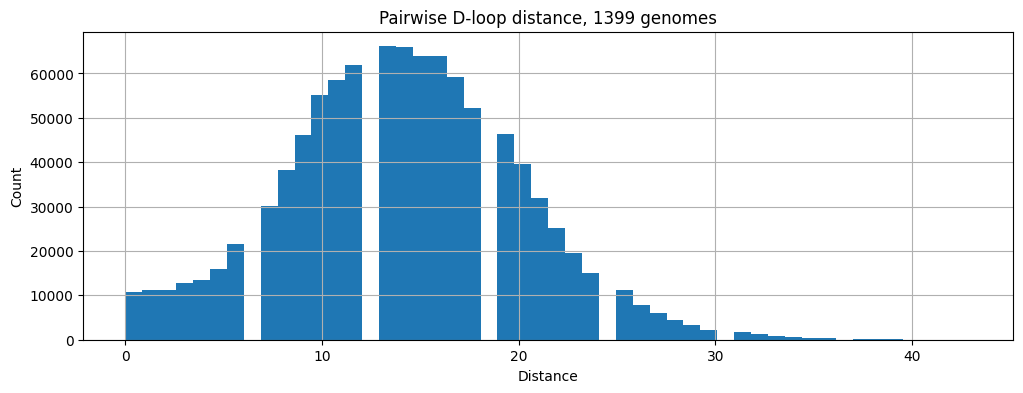

In [80]:
plt.figure(figsize=(12, 4))
df[df.dist < 100].dist.hist(bins=50)
# df.dist.hist(bins=50)
plt.title(f"Pairwise D-loop distance, {len(dloops)} genomes")
plt.xlabel("Distance")
plt.ylabel("Count")
# plt.xscale("log")
plt.show()

In [81]:
df[df.dist == 0]

,id1,id2,dist
435,OP830489.1,ON597814.1,0
437,OP830489.1,ON597812.1,0
438,OP830489.1,ON597811.1,0
439,OP830489.1,ON597810.1,0
441,OP830489.1,ON597808.1,0
...,...,...,...
975207,MZ387291.1,MZ387283.1,0
975214,MZ387291.1,MZ387276.1,0
975282,MZ387290.1,MZ387280.1,0
975419,MZ387288.1,MZ387284.1,0


In [87]:
df[df.dist == 0].shape[0] / df.shape[0]

0.01099395542084526